In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

RQ_FILE = "newRQTime.csv"
VA_FILE = "oldRQTime.csv"
WORKLOAD_NAME = ""

workload_name = input("Pleae Enter the Workload Name: ")
if workload_name.strip() == '':
    raise Exception("Invalid Workload Name")
else:
    WORKLOAD_NAME = workload_name

EXP_DATA = "exp_data"
CURR_DIR = Path(os.getcwd())

# Create directories if not exists
EXP_PATH = CURR_DIR.joinpath(EXP_DATA)

if not EXP_PATH.exists():
    EXP_PATH.mkdir()

WORKLOAD_PATH = EXP_PATH.joinpath(WORKLOAD_NAME)

if not WORKLOAD_PATH.exists():
    WORKLOAD_PATH.mkdir()

In [2]:
df = pd.read_csv(RQ_FILE, header=None, names=['Total Entries Before Compaction', 'Total Entries After Compaction', 'Range Query Driven Compaction'])
df2 = pd.read_csv(VA_FILE, header=None, names=['Total Entries Vanila', 'after', 'Range Query Vanila'])


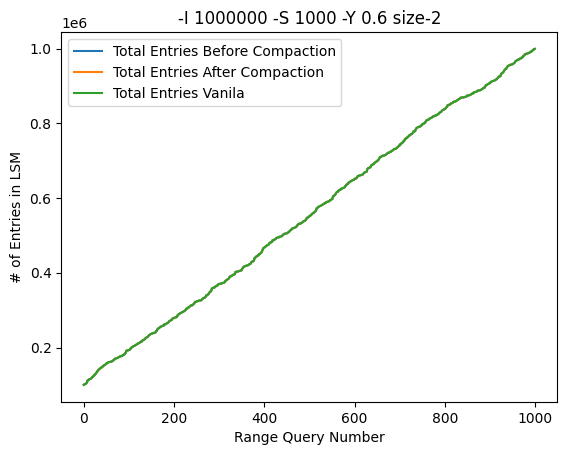

In [3]:
df1 = df.reset_index()
df2.reset_index(inplace=True)

new_df = df1.merge(df2[['index', 'Total Entries Vanila', 'Range Query Vanila']], on='index')

new_df.plot(x='index', y=['Total Entries Before Compaction', 'Total Entries After Compaction', 'Total Entries Vanila'])
plt.xlabel('Range Query Number')
plt.ylabel('# of Entries in LSM')
plt.title(WORKLOAD_NAME)
plt.savefig(f"{EXP_DATA}/{WORKLOAD_NAME}/{WORKLOAD_NAME} entries.png")
plt.show()



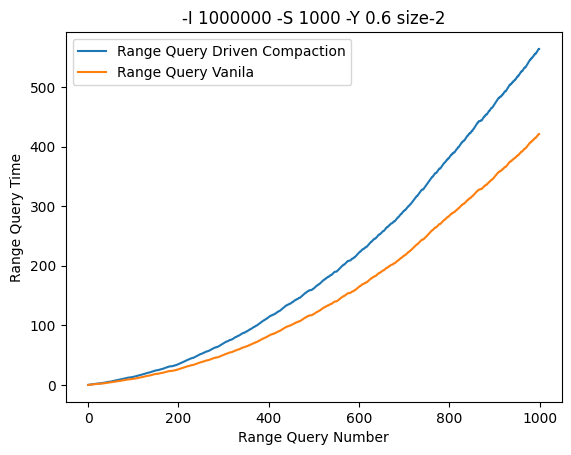

In [4]:
new_df.plot(x='index', y=['Range Query Driven Compaction', 'Range Query Vanila'])
plt.xlabel('Range Query Number')
plt.ylabel('Range Query Time')
plt.title(WORKLOAD_NAME)
plt.savefig(f"{EXP_DATA}/{WORKLOAD_NAME}/{WORKLOAD_NAME} rqtime.png")
plt.show()


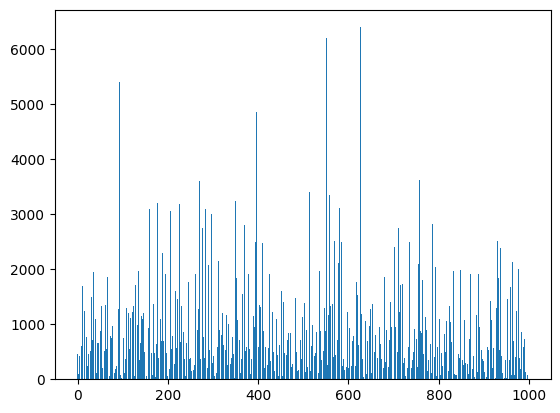

In [5]:
difference = list()
last = None

def get_line(f):
    while line:=f.readline():
        yield line

f = open('workload.txt', 'r')

for index, line in enumerate(get_line(f), 1):
    if line.startswith('S '):
        if last == None:
            last = index
        else:
            difference.append(index - last)
            last = index

x = range(len(difference))
plt.bar(x, difference)
plt.savefig(f"{EXP_DATA}/{WORKLOAD_NAME}/{WORKLOAD_NAME} rqintervals.png")
plt.show()

In [13]:
## Move files to the right folder
new_rq_time_csv = CURR_DIR.joinpath("newRQTime.csv")
old_rq_time_csv = CURR_DIR.joinpath("oldRQTime.csv")
rc_on_log = CURR_DIR.joinpath(f"{WORKLOAD_NAME} --RC-ON.log")
rc_off_log = CURR_DIR.joinpath(f"{WORKLOAD_NAME} --RC-OFF.log")

workload_file = CURR_DIR.joinpath("workload.txt")

def shift_file(f: Path):
    if f.exists():
        f.rename(CURR_DIR / EXP_DATA / WORKLOAD_NAME / f.name)

def remove_workload(f: Path):
    if f.exists():
        f.unlink()

shift_file(new_rq_time_csv)
shift_file(old_rq_time_csv)
shift_file(rc_on_log)
shift_file(rc_off_log)

remove_workload(workload_file)
